# Module 3 Homework - Seaborn
Using a dataset about Pokemon combat statistic, we will practice data visualization using the seaborn library.  
<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this notebook, we will plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fp = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"

df = pd.read_csv(fp)

## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell :immediately following the plot to describe the relationship between Attack and Defense in this dataset.

### From the plot, I observed....
Results: There is a positive correlation between `Attack` and `Defense`. The hit-points (`HP`) is higher for Pokemons with higher `Attack` and `Defense` values.

Text(0.5, 0.98, 'Pokemon Attack vs Defense Colored by HP')

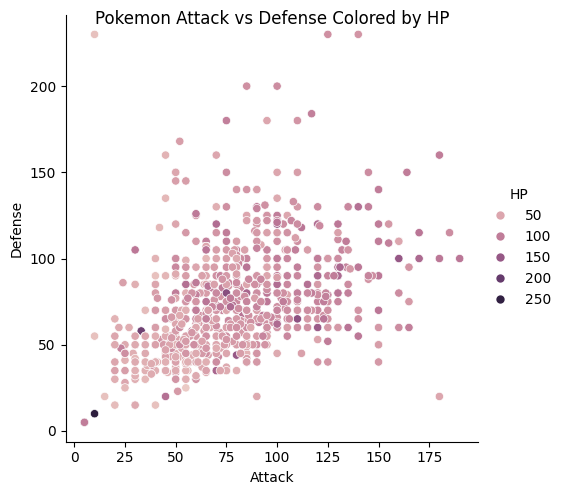

In [18]:
sns.relplot (
    data = df,
    x = "Attack",
    y = "Defense",
    hue = "HP",
).fig.suptitle("Pokemon Attack vs Defense Colored by HP")

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

Text(0.5, 0.98, 'Relationship Between Attack and Total')

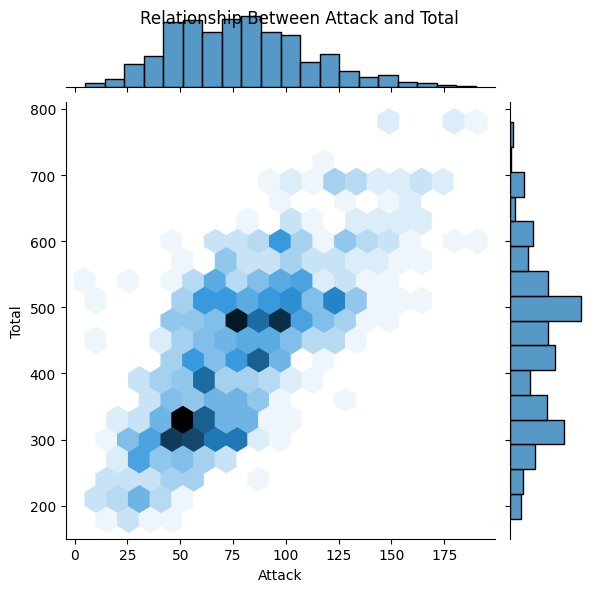

In [22]:
sns.jointplot(
    data = df,
    x = "Attack",
    y = "Total",
    kind = "hex"
).fig.suptitle("Relationship Between Attack and Total")

From the plot, I observed that in addition to Pokemon having a linear relationship between Attack and Total (which makes sense, because Attack is one component of Total), there is a large cluster of Pokemon who have around 310 and 50 Total and Attack, which are likely low-tier Pokemon. There is also a large cluster around 500 Total and 75 Attack, which are mid-tier Pokemon. The high stat section is likely legendary or psuedo legendary pokemon.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

<Axes: xlabel='count', ylabel='Type 1'>

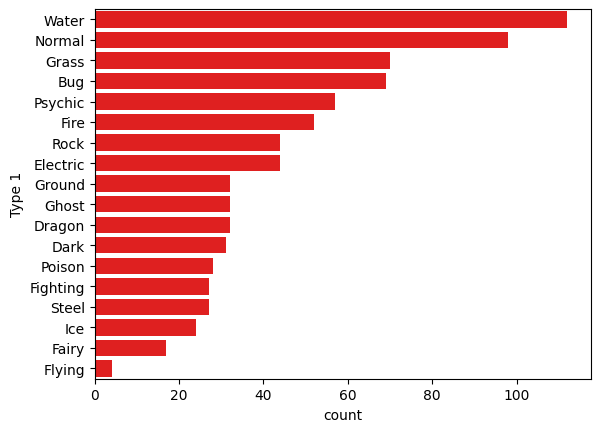

In [25]:
totalTypeOne = df["Type 1"].value_counts().index
totalTypeTwo = df["Type 2"].value_counts().index

sns.countplot(
    data=df,
    y="Type 1",
    color="red",
    order=totalTypeOne
)

<Axes: xlabel='count', ylabel='Type 2'>

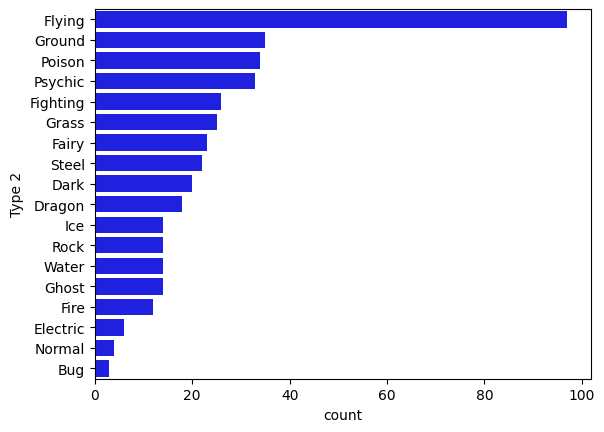

In [27]:
sns.countplot(
    data=df,
    y="Type 2",
    color="blue",
    order=totalTypeTwo
)

The most common type 1 pokemon is water, while the most common type 2 pokemon is flying.

The rarest type 1 pokemon is flying and the rarest type 2 pokemon is bug.

## Q4-6: Your own question
Come up with three more questions to further explore the pokemon dataset.

Your question(s) . . .

Which type of Pokemon tend to have the highest Attack stat?

<Axes: xlabel='Attack', ylabel='Type 1'>

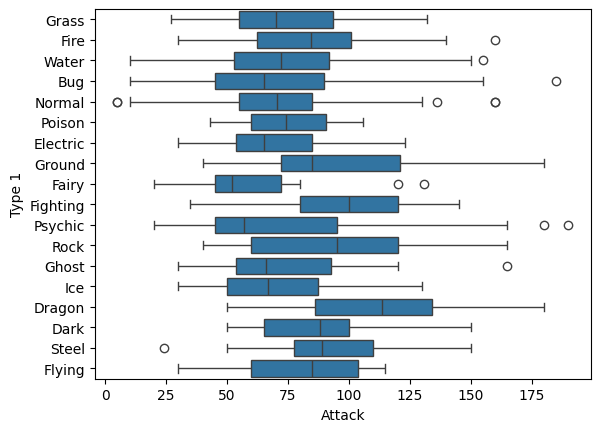

In [30]:
sns.boxplot(data=df, y="Type 1", x="Attack")

Do legendary Pokemon have higher overall stats than non-legendary?

<Axes: xlabel='Legendary', ylabel='Attack'>

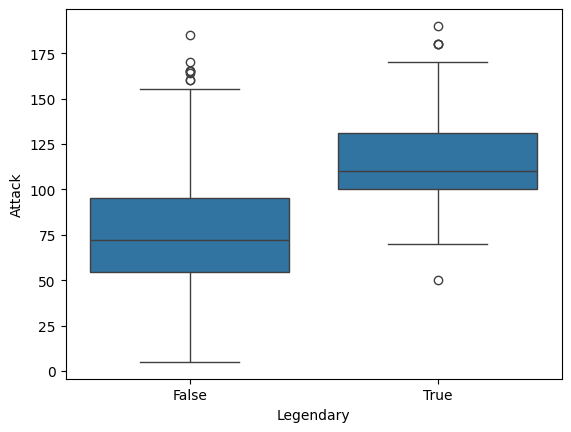

In [32]:
sns.boxplot(
    data=df,
    x="Legendary",
    y="Attack"
)

What generation has the most legendary pokemon?

<Axes: xlabel='Generation'>

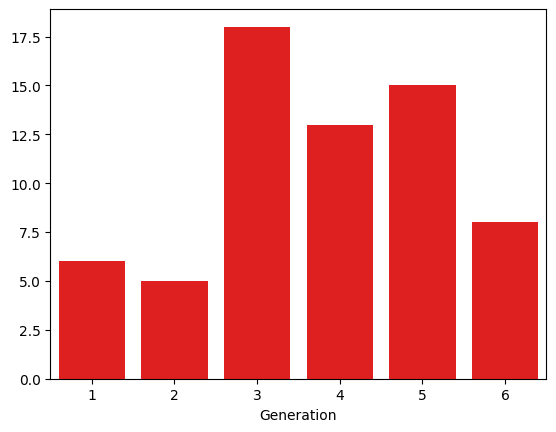

In [43]:
legendary_counts = (
    df[df["Legendary"] == True]
    ["Generation"]
    .value_counts()
    .sort_index()
)


sns.barplot(
    x=legendary_counts.index,
    y=legendary_counts.values,
    color="red"
)
